## Day 2: Backpropagation

## 2. Mathematical representation (cont'd)

### A brief review from forward propagation...
<img src="figures/forwardpropagation.png" width=300>

* The value of each output neuron can be calculated using: 
$$ y_{j}=\sum_{i}^N x_{i}w_{ij} + b_{j} $$
$$ Y = XW + B $$
Note: Y is a function of X. --> We can calculate $\frac{\partial Y}{\partial X}$.


* The error $E$ can be calculated using Mean Squared Error (MSE): 
$$ E = \frac{1}{n}\sum_{k}^{n}(y_{k}-y_{k}^{*})^{2} $$
Note: E is a function of Y.  --> We can calculate $\frac{\partial E}{\partial Y}$.


### Gradient descent 

To adjust the parameters of the NN ($w_{ij}$'s and $b_j$) so that the total error $E$ is minimized, one way to do so is to find out how the error changes with respect to the parameter $w$, then use this information to adjust the parameter. Concretely, we can update $w$ by the partial derivative of $E$ with respect to $w$:

$$ w\leftarrow w-\alpha\frac{\partial E}{\partial w}. $$

Here, $\alpha$ is called the "learning rate", which is a preset number between [0, 1]. The learning rate determines how rapidly we adjust $w$ according to $\frac{\partial E}{\partial w}$.

*Questions*:
1. Why is there a negative sign in front of the second term?
2. How to calculate $\frac{\partial E}{\partial w}$?

To answer question 2, let's first simply review the NN diagram:

<img src="figures/fullyConnectedNN.png" width=500> 
<img src="figures/simplifiedNN.png" width=600>

**Remember! Without an activation function, the output of a layer is the input of the next one. That is, $Y_1=X_2$, $Y_2=X_3$.**

## Backward propagation

<img src="figures/backpropagation.png" width=400>


####  Two key results for performing backpropagation

$$ \frac{\partial E}{\partial X} = \frac{\partial E}{\partial Y}W^{T} $$

$$ \frac{\partial E}{\partial W} = X^{T}\frac{\partial E}{\partial Y} $$

We will now see how these are derived - you do not need to ___know___ them to train NNs. This is deep under the source code of your DL package, but is the heart and soul of neural networks as we know today.

### Calculating $\frac{\partial E}{\partial w}$

* We know how to calculate $\frac{\partial E}{\partial Y}$ for layer 3 from the loss function.
* Then by chain rule:
$$ \frac{\partial E}{\partial w}=\sum_{j}\frac{\partial E}{\partial y_{j}}\frac{\partial y_{j}}{\partial w} $$

As $$ \frac{\partial (XW + B)}{\partial W} = X $$

Explicitly,
$$ 
\begin{align*}
\frac{\partial E}{\partial w_{ij}} &= \frac{\partial E}{\partial y_{1}}\frac{\partial y_{1}}{\partial w_{ij}}+\dots+\frac{\partial E}{\partial y_{j}}\frac{\partial y_{j}}{\partial w_{ij}} \\
&=\frac{\partial E}{\partial y_{j}}x_{i} 
\end{align*}
$$

In matrix representation,
$$ 
\begin{align*}
\frac{\partial E}{\partial W} &= \left[\begin{array}{ccc}
\frac{\partial E}{\partial w_{11}} & \cdots & \frac{\partial E}{\partial w_{1j}}\\
\vdots & \ddots & \vdots\\
\frac{\partial E}{\partial w_{i1}} & \cdots & \frac{\partial E}{\partial w_{ij}} \end{array}\right] \\
&=\left[\begin{array}{ccc}
\frac{\partial E}{\partial y_{1}}x_{1} & \cdots & \frac{\partial E}{\partial y_{j}}x_{1}\\
\vdots & \ddots & \vdots\\
\frac{\partial E}{\partial y_{1}}x_{i} & \cdots & \frac{\partial E}{\partial y_{j}}x_{i} \end{array}\right] \\
&=\left[\begin{array}{c}
x_{1}\\
\vdots\\
x_{i} \end{array}\right] \left[\frac{\partial E}{\partial y_{1}}, \dots, \frac{\partial E}{\partial y_{j}}\right] \\
&= X^{T}\frac{\partial E}{\partial Y} 
\end{align*}
$$

**Exercise**: To update the biases $b_j$, one would need to calculate $\frac{\partial E}{\partial b}$. The derivation is very similar to deriving $\frac{\partial E}{\partial w}$.  This will be left as an exercise.

Great! Now we know how to update the weights $w_{ij}$'s for layer 3. But how to update $w_{ij}$'s for layers 2 and 1?

In general, the following holds for all the layers:

where

$$\frac{\partial E}{\partial X} = \left[\frac{\partial E}{\partial x_{1}}, \frac{\partial E}{\partial x_{2}}, \dots, \frac{\partial E}{\partial x_{i}}, \dots \right] $$

### Notation:
$ \Large \frac{\partial E}{\partial Y} $ is output error

$ \Large \frac{\partial E}{\partial X} $ is input error

(Will use this same notation in the code to denote these derivatives, for every layer)

$$\frac{\partial E}{\partial Y} = \left[\frac{\partial E}{\partial y_{1}}, \frac{\partial E}{\partial y_{2}}, \dots,\frac{\partial E}{\partial y_{j}}, \dots \right] $$

Note: the number of terms in each row vector differs depending on which layer we are looking at.

* As seen in layer 3, if we know how to calculate $\frac{\partial E}{\partial Y}$, we can calculate $\frac{\partial E}{\partial w}$.
* Recall that the output of a layer is the input of the next one. Therefore, for layer 2, $H_2=Y_2=X_3$ implies $\frac{\partial E}{\partial Y_2} = \frac{\partial E}{\partial X_3} = \frac{\partial E}{\partial H_2}$.
* So we need to know how to calculate $\frac{\partial E}{\partial X_3}$
* ... Chain rule again!

$$ \frac{\partial E}{\partial x_{i}} = \sum_{j}\frac{\partial E}{\partial y_{j}}\frac{\partial y_{j}}{\partial x_{i}}$$

As $$ \frac{\partial (XW + B)}{\partial X} = W $$

Again, explicitly,

$$
\begin{align*}
\frac{\partial E}{\partial x_{i}} &= \frac{\partial E}{\partial y_{1}}\frac{\partial y_{1}}{\partial x_{i}}+\dots+\frac{\partial E}{\partial y_{j}}\frac{\partial y_{j}}{\partial x_{i}} \\
&=\frac{\partial E}{\partial y_{1}}w_{i1}+\dots+\frac{\partial E}{\partial y_{j}}w_{ij}
\end{align*}
$$
 
In matrix representation,
$$
\begin{align*}
\frac{\partial E}{\partial X} &= \left[\left(\frac{\partial E}{\partial y_{1}}w_{11}+\dots+\frac{\partial E}{\partial y_{j}}w_{1j}\right), \dots, \left(\frac{\partial E}{\partial y_{1}}w_{i1}+\dots+\frac{\partial E}{\partial y_{j}}w_{ij}\right)\right] \\
&=\left[\frac{\partial E}{\partial y_{1}}, \dots, \frac{\partial E}{\partial y_{j}}\right]\left[\begin{array}{ccc}
w_{11} & \cdots & w_{i1}\\
\vdots & \ddots & \vdots\\
w_{1j} & \cdots & w_{ij}
\end{array}\right] \\
&=\frac{\partial E}{\partial Y}W^{T}
\end{align*} 
$$

* Using $\frac{\partial E}{\partial X_3}$ as $\frac{\partial E}{\partial Y_2}$, we can now update the weights $w_{ij}$'s for layer 2.

This procedure repeats until the weights and biases of all layers are all updated.

<img src="figures/backpropchain.png" width=900>

## Backpropagation with activation function

* With an activation function, the NN diagram would become:

<img src="figures/simplifiedNNwithAF.png" width=900>

* Unlike before, $\frac{\partial E}{\partial X} \neq \frac{\partial E}{\partial Y}$. It is because the output (Y) of a layer is no longer the input (X) of the next one.
* But we know they are related by $X = \sigma(Y)$. Hence we can calculate $\frac{\partial X}{\partial Y} = \sigma'(Y)$.
* The backpropagation procedure stays mostly the same, except that now we need to add an extra term in the chain rule:

<img src="figures/backpropwithAF.png" width=900>

## Code

In [1]:
# load Python libraries: numpy, keras and tensorflow (only for loading MNIST dataset)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.load('mnist.npz')
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


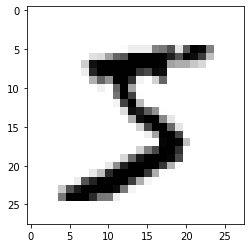

5


In [2]:
# plot an image
plt.imshow(x_train[0], cmap=plt.get_cmap('binary'))
plt.show()

# check the label
print(y_train[0])

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255

# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255

# encode output which is a number in range [0,9] into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

int_encoded = label_encoder.fit_transform(y_train)
int_encoded = int_encoded.reshape(len(int_encoded),1)
y_train = onehot_encoder.fit_transform(int_encoded)

int_encoded = label_encoder.fit_transform(y_test)
int_encoded = int_encoded.reshape(len(int_encoded),1)
y_test = onehot_encoder.fit_transform(int_encoded)

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
# Check the dimension of the training dataset
x_train.shape

(60000, 1, 784)

In [5]:
# A function to initialize weights and bias with random numbers between [-0.5, 0.5)
def init_layer_weights(input_size, output_size):
    weights = np.random.rand(input_size, output_size) - 0.5;
    bias = np.random.rand(1, output_size) - 0.5;
    return weights, bias

# A function to calculate the mean squared error (MSE)
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

# A function to calculate the derivative of the mean squared error (MSE) with respect to y_true
def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

In [6]:
def forward_propagation(input_data, layer):
    weights, bias = layer
    output = np.dot(input_data, weights) + bias
    return output

def backward_propagation(output_error, input_data, layer, learning_rate):
    weights, bias = layer
    input_error = np.dot(output_error, weights.T)
    weights_error = np.dot(input_data.T, output_error)
    weights_updated = weights -  (learning_rate * weights_error)
    bias_updated = bias - (learning_rate * output_error)
    updated_layer = (weights_updated, bias_updated)
    return input_error, updated_layer

def forward_propagation_activation(input_data):
    output = np.tanh(input_data)
    return output

def backward_propagation_activation(output_error, input_data):
    activation_prime = 1 - np.tanh(input_data)**2
    final_output_error = activation_prime * output_error
    return final_output_error

In [7]:
# In this example, we construct a three-layer neural network: one input layer, one hidden layer, and one output layer
layer1 = init_layer_weights(28*28,150);
layer2 = init_layer_weights(150,50);
layer3 = init_layer_weights(50,10);

In [8]:
trainSampleX = x_train[0]
trainSampleY = y_train[0]

In [9]:
trainSampleX.shape

(1, 784)

In [10]:
#forward pass
def fullforward(X, layer1,layer2,layer3):
    output1 = forward_propagation(X, layer1)
    output1act = forward_propagation_activation(output1)
    output2 = forward_propagation(output1act, layer2)
    output2act = forward_propagation_activation(output2)
    output3 = forward_propagation(output2act, layer3)
    output3act = forward_propagation_activation(output3)
    return output1,output2,output3,output1act,output2act,output3act

In [11]:
#backward pass
def fullbackward(X,outputError,layer1,layer2,layer3,output1,output2,output3,output1act,output2act,output3act,learning_rate):
    back_output3act = backward_propagation_activation(outputError, output3)
    back_output3, updated_layer3 = backward_propagation(back_output3act, output2act, layer3, learning_rate)
    back_output2act = backward_propagation_activation(back_output3, output2)
    back_output2, updated_layer2 = backward_propagation(back_output2act, output1act, layer2, learning_rate)
    back_output1act = backward_propagation_activation(back_output2, output1)
    back_output1, updated_layer1 = backward_propagation(back_output1act, trainSampleX, layer1, learning_rate)
    return updated_layer1, updated_layer2, updated_layer3

In [12]:
def train(x_train, y_train, nsamples, layers, epochs, learning_rate):
    updated_layer1, updated_layer2, updated_layer3 = layers[0], layers[1], layers[2]
    for j in range(epochs):
        E = 0;
        for i in range(nsamples):
            x = x_train[i]
            y = y_train[i]
            #fwd pass
            output1,output2,output3,output1act,output2act,output3act = fullforward(x, updated_layer1, updated_layer2, updated_layer3)
            #compute loss
            E += mse(y,output3act)
            #compute loss derivative to initiate backward pass
            dE = mse_prime(y,output3act)
            #backward pass
            updated_layer1, updated_layer2, updated_layer3 = fullbackward(x,dE,updated_layer1, updated_layer2, updated_layer3, 
                                                                          output1, output2, output3, output1act, output2act, 
                                                                          output3act, learning_rate)
            #avg error
            E /= nsamples
        print("Epoch number: ", j)
        print("Epoch error is: ", E)
        
    return (updated_layer1, updated_layer2, updated_layer3)

In [13]:
len(layer1)

2

In [14]:
layer1[0].shape

(784, 150)

In [15]:
nsamples = 5000
learning_rate = 0.1
epochs = 35
layers = (layer1, layer2, layer3)
trained_layers = train(x_train, y_train, nsamples, layers, epochs, learning_rate)

Epoch number:  0
Epoch error is:  3.5866614460387985e-05
Epoch number:  1
Epoch error is:  2.134708475909209e-05
Epoch number:  2
Epoch error is:  2.1751440079540737e-05
Epoch number:  3
Epoch error is:  2.1483602339917206e-05
Epoch number:  4
Epoch error is:  1.605819022256274e-05
Epoch number:  5
Epoch error is:  1.2003542755830641e-05
Epoch number:  6
Epoch error is:  5.777917507815482e-06
Epoch number:  7
Epoch error is:  3.4792191416382295e-06
Epoch number:  8
Epoch error is:  3.098827797863245e-06
Epoch number:  9
Epoch error is:  2.7264377496991146e-06
Epoch number:  10
Epoch error is:  3.1815766902693007e-06
Epoch number:  11
Epoch error is:  3.8920198924749914e-06
Epoch number:  12
Epoch error is:  4.550865005460688e-06
Epoch number:  13
Epoch error is:  4.61404421555697e-06
Epoch number:  14
Epoch error is:  4.566100678937121e-06
Epoch number:  15
Epoch error is:  4.723158286755243e-06
Epoch number:  16
Epoch error is:  4.781026977263896e-06
Epoch number:  17
Epoch error is: 

In [16]:
x_test.shape

(10000, 1, 784)

In [17]:
x_train.shape

(60000, 1, 784)

In [18]:
#testing
idx = np.random.randint(0,10000)
print("Test Sample ID: ", idx)
testSampleX = x_test[idx]
testSampleY = y_test[idx]

_,_,_,_,_, pred = fullforward(testSampleX, trained_layers[0], trained_layers[1], trained_layers[2])
print("Prediction: ", np.argmax(pred))
print("Truth: ", np.argmax(testSampleY))

Test Sample ID:  4746
Prediction:  7
Truth:  7


In [19]:
pred_results=[]
n_test_samples = 10000
for i in range(n_test_samples):
    _,_,_,_,_, pred = fullforward(x_test[i], trained_layers[0], trained_layers[1], trained_layers[2])
    final_pred = np.argmax(pred)
    truth_value = np.argmax(y_test[i])
    #print("Prediction: ", final_pred)
    #print("Truth: ", truth_value)
    err = np.abs(final_pred - truth_value)
    pred_results.append(err)

In [20]:
percent_accuracy = (n_test_samples -  np.count_nonzero(np.asarray(pred_results)))/100
print("Percent Accuracy of NN: ", percent_accuracy)

Percent Accuracy of NN:  83.51
